# Handwritten Digit Recognition - Confidence Level

I am curious to see how confident the model is of its guesses.

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
# Load dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize the data
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Build the model
model = tf.keras.models.Sequential()

# Model layers
model.add(tf.keras.layers.Flatten(input_shape=(28, 28)))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(10, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10)

# Evaluate the model
loss, accuracy = model.evaluate(x_test, y_test)
print('Loss: ', loss)
print('Accuracy: ', accuracy)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 2.3629 - accuracy: 0.1934
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.2967 - accuracy: 0.1363
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3024 - accuracy: 0.1064
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3018 - accuracy: 0.1132
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0900
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0900
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0900
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0900
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 2.3026 - accuracy: 0.0900
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 2.3026 

## Prediction

In [3]:
digit1 = cv2.imread(f"digits/digit1.png", cv2.IMREAD_GRAYSCALE)
digit1 = np.invert(np.array([digit1]))
prediction = model.predict(digit1)

# This is what the prediction looks like:
print(prediction)

1/1 [==============================] - 0s 143ms/step
[[ -583.5952   -683.45325  -300.7768   -457.1893  -1446.9119   -520.02783
   -623.3985   -528.1706   -381.1228   -914.28735]]


1/1 [==============================] - 0s 30ms/step


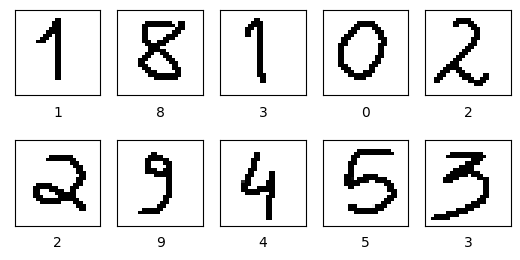

In [3]:
# Read digits we made on Ms Paint :)
image_number = 1
for _ in os.listdir('digits'):
    try:
        img = cv2.imread(f"digits/digit{image_number}.png", cv2.IMREAD_GRAYSCALE)
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        # Show the images in a grid
        plt.subplot(3, 5, image_number)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.xlabel(np.argmax(prediction))
        image_number += 1
    except Exception as e:
        pass

1/1 [==============================] - 0s 28ms/step


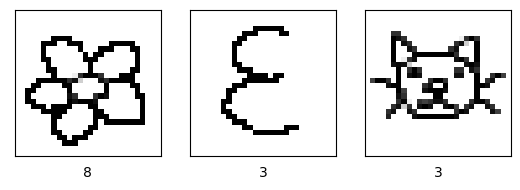

In [39]:
# Not digits
image_number = 1
for _ in os.listdir('digits/notadigit'):
    try:
        img = cv2.imread(f"digits/notadigit/notadigit{image_number}.png", cv2.IMREAD_GRAYSCALE)
        img = np.invert(np.array([img]))
        prediction = model.predict(img)
        # Show the images in a grid
        plt.subplot(1, 3, image_number)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(img[0], cmap=plt.cm.binary)
        plt.xlabel(np.argmax(prediction))
        image_number += 1
    except Exception as e:
        pass